# Tests for Statistics Functions

I have written several of my own statistics functions to which I have found not analog amongst the numpy and scipy modules. Howver, since I have written these functions, there is more of a burden to perform explicit tests of these functions to show that they work correctly.

In [2]:
%matplotlib inline
import sys
sys.path.insert(1,'./code')

import numpy as np
from statfunctions import *
import seaborn as sns
import scipy.stats as stats
import itertools

C:\Anaconda\envs\py35\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


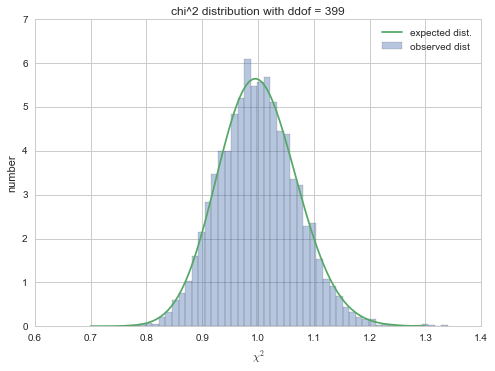

In [3]:
# check to see that the outputs to the chi^2 function do indeed follow the chi^2 distribution
# when input with gaussian data

N = 5000  
Z = []

for i in range(N):
    num_points = 400
    dy = 2*(np.ones((num_points,)) + .17 * np.random.normal(size=(num_points,)))
    y  = dy * np.random.normal(size=(num_points,))
    z, dz = chi_squared(y,dy)
    Z.append(z)
    
Z = np.array(Z)

sns.distplot(Z, kde=False, norm_hist=True, label='observed dist')

x = np.linspace(.7,1.3,100)
ddof = num_points - 1
f = stats.chi2.pdf(x * ddof, ddof)*ddof
plt.plot(x,f, label='expected dist.')
plt.legend()
plt.xlabel('$\chi^2$')
plt.ylabel('number')
_ = plt.title('chi^2 distribution with ddof = ' + str(ddof))


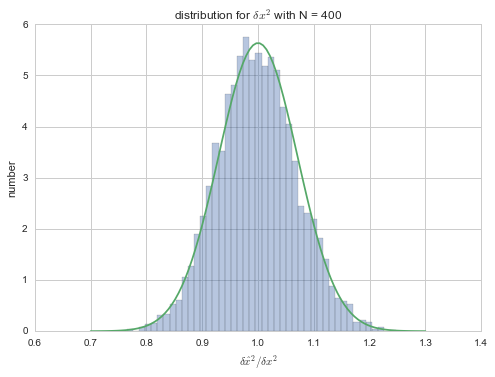

In [4]:
# test the statistical properties of the variance estimate for the standard error in the mean:

N  = 5000 
Z  = []
dZ = []

for i in range(N):
    num_points = 400
    dy = 1
    y  = dy * np.random.normal(size=(num_points,))
    z, dz = unweighted_mean(y)
    Z.append(z)
    dZ.append(dz)
    
Z = np.array(Z)
dZ = np.array(dZ)

dy2 = (dy**2/(num_points))
ddy2 = np.sqrt(2/(num_points - 1)) * dy2

sns.distplot(dZ**2/dy2, kde=False, norm_hist=True)

x = np.linspace(.7,1.3,100)
f = stats.norm.pdf(x, loc=1, scale= ddy2/dy2)
plt.plot(x,f)
plt.xlabel('$\delta \hat{x}^2/\delta x^2$')
plt.ylabel('number')
_ = plt.title('distribution for $\delta x^2$ with N = ' + str(num_points))